# T-cell chemokine microarrays differential expression analysis

## Index

1. [Experimental design](#Experimental-design)
2. [Loading libraries, dependencies and data](#Loading-libraries,-dependencies-and-data)
4. [Boxplot of log2 intensities for the raw data](#Boxplot-of-log2-intensities-for-the-raw-data)
5. [Background normalization](#Background-normalization)
6. [PCA plot](#PCA-plot)
7. [tSNE plot](#tSNE-plot)
8. [Intensity based filtering](#Intensity-based-filtering)
9. [Probe-based annotation for MTA 1.0](#Probe-based-annotation-for-MTA-1.0)
10. [Contrasts and hypothesis testing using `limma`](#Contrasts-and-hypothesis-testing-using-limma)
10. [Transcript-based annotation for-MTA 1.0](#Transcript-based-annotation-for-MTA-1.0)
11. [Contrasts and hypothesis testing for transcripts using `limma`](#Contrasts-and-hypothesis-testing-for-transcripts-using-limma)
12. [Volcano plot of differentially expressed genes](#Volcano-plot-of-differentially-expressed-genes)
13. [Distrubution of expression values](#Distrubution-of-expression-values)
14. [Heatmap](#Heatmap)
16. [Enrichment analysis](#Enrichment-analysis)
10. [Session info](#Session-info)

## Experimental design

| Chip   | Filename                     | Day post infection | Treatment      | Tissue |
|--------|------------------------------|--------------------|----------------|--------|
| 1      | eberlein_d8_1_Mouse430_2.CEL | 8                  | ex vivo        | spleen |
| 2      | eberlein_d8_2_Mouse430_2.CEL | 8                  | ex vivo        | spleen |
| 3      | eberlein_d8_3_Mouse430_2.CEL | 8                  | ex vivo        | spleen |
| 4      | eberlein_d8_4_Mouse430_2.CEL | 8                  | 3h stimulation | spleen |
| 5      | eberlein_d8_5_Mouse430_2.CEL | 8                  | 3h stimulation | spleen |
| 6      | eberlein_d8_6_Mouse430_2.CEL | 8                  | 3h stimulation | spleen |
| 7      | eberlein_1_1_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 8      | eberlein_1_2_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 9      | eberlein_1_3_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 10     | eberlein_1_4_Mouse430_2.CEL  | 46                 | ex vivo        | spleen |
| 11     | eberlein_1_5_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |
| 12     | eberlein_1_6_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |
| 13     | eberlein_1_7_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |
| 14     | eberlein_1_8_Mouse430_2.CEL  | 46                 | 3h stimulation | spleen |

> The GeneChip™ Mouse Genome 430 2.0 Array is the first and most comprehensive whole mouse genome expression array:
• Complete coverage of the Mouse Expression Set 430 for analysis of over 39,000 transcripts on a single array
• The Power of the Probe Set - offering multiple independent measurements for each transcript delivering the greatest accuracy and reproducibility of any microarray platform
• More information from every experiment for more complete and efficient analysis 

## Loading libraries and dependencies

In [21]:
suppressMessages({
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install("mouse4302.db")
BiocManager::install("oligo")

install.packages("devtools")
library(devtools)
install.packages("plotly")
install.packages("Rtsne")
library(remotes)

install_github("wjawaid/enrichR")
install_github("r-lib/remotes")

library(matrixStats)
library(mouse4302.db)
library(oligo)
library(limma)
library(dplyr)
library(magrittr)
library(stringr)
library(ggplot2)
library(plotly)
library(geneplotter)
library(RColorBrewer)
library(pheatmap)
library(Rtsne)
library(enrichR)
})


The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages

The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages

The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages

The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//RtmpTRgefN/downloaded_packages


In [4]:
setwd("Homann_T_cell_chemokine_project/CEL_files")
cel_files<-list.celfiles()

In [5]:
SDRF <- read.delim("t_cell_chemokine.sdrf.txt")
rownames(SDRF) <- SDRF$filename

In [6]:
SDRF <- AnnotatedDataFrame(SDRF)

In [7]:
raw_data <- oligo::read.celfiles(filenames = file.path(".", SDRF$filename), verbose = FALSE, phenoData = SDRF)
head(Biobase::pData(raw_data))

installing the source package ‘pd.mouse430.2’



Reading in : ./eberlein_d8_1_Mouse430_2.CEL
Reading in : ./eberlein_d8_2_Mouse430_2.CEL
Reading in : ./eberlein_d8_3_Mouse430_2.CEL
Reading in : ./eberlein_d8_4_Mouse430_2.CEL
Reading in : ./eberlein_d8_5_Mouse430_2.CEL
Reading in : ./eberlein_d8_6_Mouse430_2.CEL
Reading in : ./eberlein_1_1_Mouse430_2.CEL
Reading in : ./eberlein_1_2_Mouse430_2.CEL
Reading in : ./eberlein_1_3_Mouse430_2.CEL
Reading in : ./eberlein_1_4_Mouse430_2.CEL
Reading in : ./eberlein_1_5_Mouse430_2.CEL
Reading in : ./eberlein_1_6_Mouse430_2.CEL
Reading in : ./eberlein_1_7_Mouse430_2.CEL
Reading in : ./eberlein_1_8_Mouse430_2.CEL


Warning message in oligo::read.celfiles(filenames = file.path(".", SDRF$filename), :
“'channel' automatically added to varMetadata in phenoData.”

,chip,filename,day_post_infection,treatment,tissue,X
,<int>,<fct>,<int>,<fct>,<fct>,<lgl>
eberlein_d8_1_Mouse430_2.CEL,1,eberlein_d8_1_Mouse430_2.CEL,8,ex vivo,spleen,NA
eberlein_d8_2_Mouse430_2.CEL,2,eberlein_d8_2_Mouse430_2.CEL,8,ex vivo,spleen,NA
eberlein_d8_3_Mouse430_2.CEL,3,eberlein_d8_3_Mouse430_2.CEL,8,ex vivo,spleen,NA
eberlein_d8_4_Mouse430_2.CEL,4,eberlein_d8_4_Mouse430_2.CEL,8,3h stimulation,spleen,NA
eberlein_d8_5_Mouse430_2.CEL,5,eberlein_d8_5_Mouse430_2.CEL,8,3h stimulation,spleen,NA
eberlein_d8_6_Mouse430_2.CEL,6,eberlein_d8_6_Mouse430_2.CEL,8,3h stimulation,spleen,NA


## Boxplot of log2-intensities for the raw data

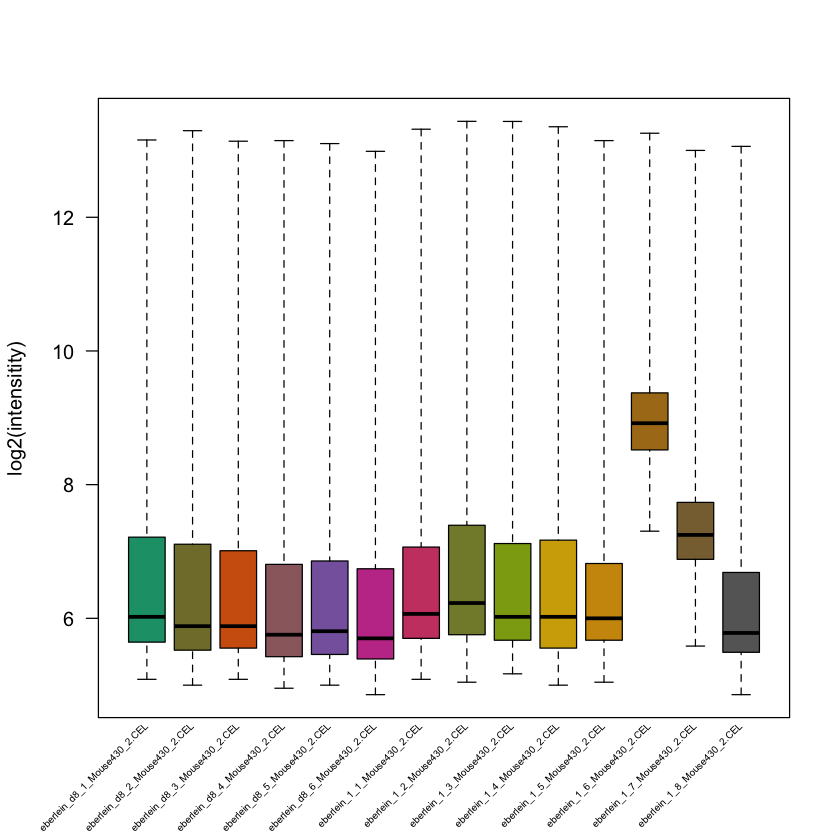

In [8]:
oligo::boxplot(raw_data, 
               ylab="log2(intensitity)",
               xlab=element_blank(),
               las=2,
               main=element_blank(),
               xaxt="n")
end_point = 0.5 + nrow(Biobase::pData(raw_data))
text(seq(1,end_point,by=1), par("usr")[3]-0.1, 
     srt = 45, adj= 1, xpd = TRUE,
     labels = paste(rownames(Biobase::pData(raw_data))), cex=0.5)

## Background normalization

In [9]:
cel_norm <- oligo::rma(raw_data)

Background correcting
Normalizing
Calculating Expression


## PCA plot

In [10]:
exp_cel <- Biobase::exprs(cel_norm)
PCA <- prcomp(t(exp_cel), scale = FALSE)
PCA$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
eberlein_d8_1_Mouse430_2.CEL,-81.09158,-9.530479,35.85827,5.559815,-8.910552,3.7084440,-30.527087,4.385424,-3.2321424,1.2638393,-3.6769695,-9.8545779,13.2521443,1.351402e-13
eberlein_d8_2_Mouse430_2.CEL,-80.77614,-10.488784,37.00911,17.511213,-1.243292,-1.7107109,3.360176,-1.278047,-18.5681389,-14.5736144,3.4562676,1.0714498,-15.1268640,-6.603662e-13
eberlein_d8_3_Mouse430_2.CEL,-78.28746,-16.741183,51.85344,22.471358,-4.270587,0.1310397,11.013166,-10.598255,16.3032370,13.8227340,0.7910958,9.4803008,-0.3980543,2.598733e-13
eberlein_d8_4_Mouse430_2.CEL,48.10118,59.292983,26.06567,-16.899187,4.195842,-13.7475356,7.173062,13.361450,-1.2795336,9.4450977,-18.3026415,-6.1958805,-7.9439097,3.804827e-14
eberlein_d8_5_Mouse430_2.CEL,53.41011,61.684509,20.80864,-17.899093,5.534334,-4.8760474,5.236079,7.564366,-11.1704219,8.3514190,19.0929323,6.3396519,8.9298953,3.722609e-14
eberlein_d8_6_Mouse430_2.CEL,33.02948,57.270800,21.84656,-26.029650,10.277559,25.8251077,-1.286148,-7.336764,13.1776622,-17.0268414,-0.7451621,1.1034237,-0.6629287,1.335824e-13
eberlein_1_1_Mouse430_2.CEL,-75.47405,-21.237259,-38.31373,-7.772943,8.151220,26.8369558,12.908966,-10.640627,-10.4602931,13.1808068,-1.6339466,-10.1315394,0.1071298,-2.001578e-14
eberlein_1_2_Mouse430_2.CEL,-79.64184,-15.574125,-44.90470,-12.220549,3.280901,1.7020466,-12.711493,8.352032,-2.7074466,1.0975577,-7.6570173,22.2614491,-1.1717593,2.545470e-13
eberlein_1_3_Mouse430_2.CEL,-79.98321,-19.757980,-19.73325,-1.409572,1.028437,-19.9938129,22.633678,1.422408,2.4697773,-14.4031093,-3.8822817,-3.0958028,15.4221021,-5.520803e-13
eberlein_1_4_Mouse430_2.CEL,-72.56155,-22.696371,-31.01310,-16.896950,-4.168261,-13.8204284,-7.978389,7.021779,14.4820478,1.6058153,13.5580546,-9.9169181,-12.2358701,6.822068e-13


In [14]:
percentVar <- round(100*PCA$sdev^2/sum(PCA$sdev^2),1)
sd_ratio <- sqrt(percentVar[2] / percentVar[1])

dataGG <- data.frame(PC1 = PCA$x[,1], PC2 = PCA$x[,2],
                    Day_post_infection = 
                     as.factor(Biobase::pData(cel_norm)$day_post_infection),
                    Treatment=Biobase::pData(cel_norm)$treatment)

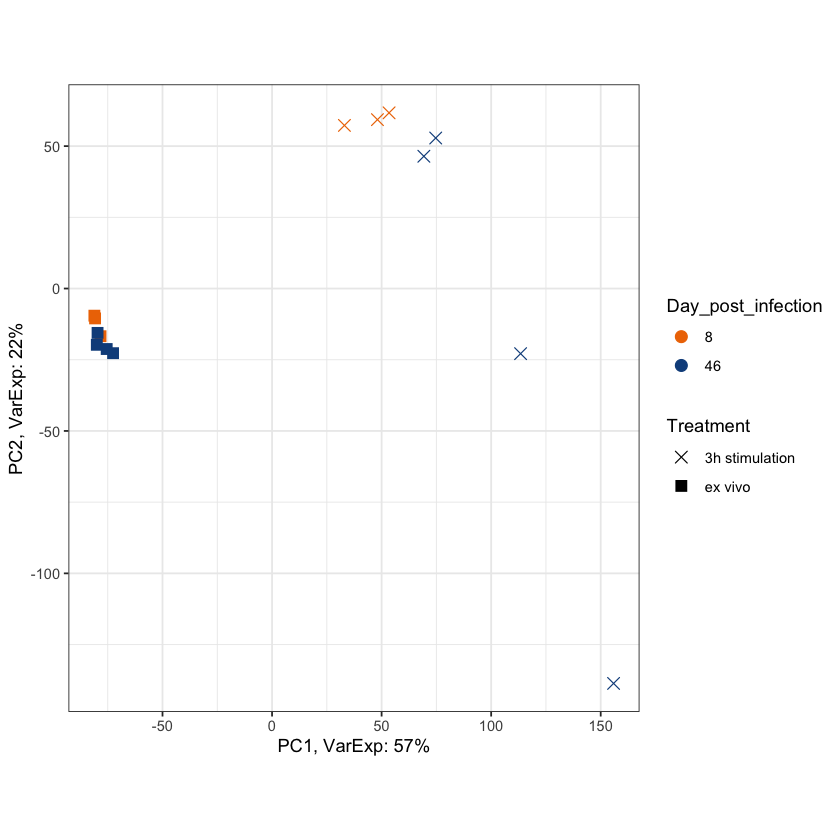

In [16]:
ggplot(dataGG, aes(PC1, PC2)) +
    geom_point(aes(colour = Day_post_infection, shape = Treatment), size=3) +
    xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) +
    ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme_bw()+
    coord_fixed(ratio = 1.3) +
    scale_shape_manual(values = c(4,15)) +
    scale_color_manual(values = c("darkorange2", "dodgerblue4"))

## tSNE plot

In [17]:
tsne <- Rtsne(PCA$x, dims = 3, perplexity=2, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 14 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 3, perplexity = 2.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.479592)!
Learning embedding...
Iteration 50: error is 56.875213 (50 iterations in 0.00 seconds)
Iteration 100: error is 47.627116 (50 iterations in 0.00 seconds)
Iteration 150: error is 43.654227 (50 iterations in 0.00 seconds)
Iteration 200: error is 47.351131 (50 iterations in 0.00 seconds)
Iteration 250: error is 64.943547 (50 iterations in 0.00 seconds)
Iteration 300: error is 0.716210 (50 iterations in 0.00 seconds)
Iteration 350: error is 0.172073 (50 iterations in 0.00 seconds)
Iteration 400: error is 0.039095 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.061326 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.035939 (50 iterations in 0.00 seconds)
Fitting performed in 0.01 seconds.


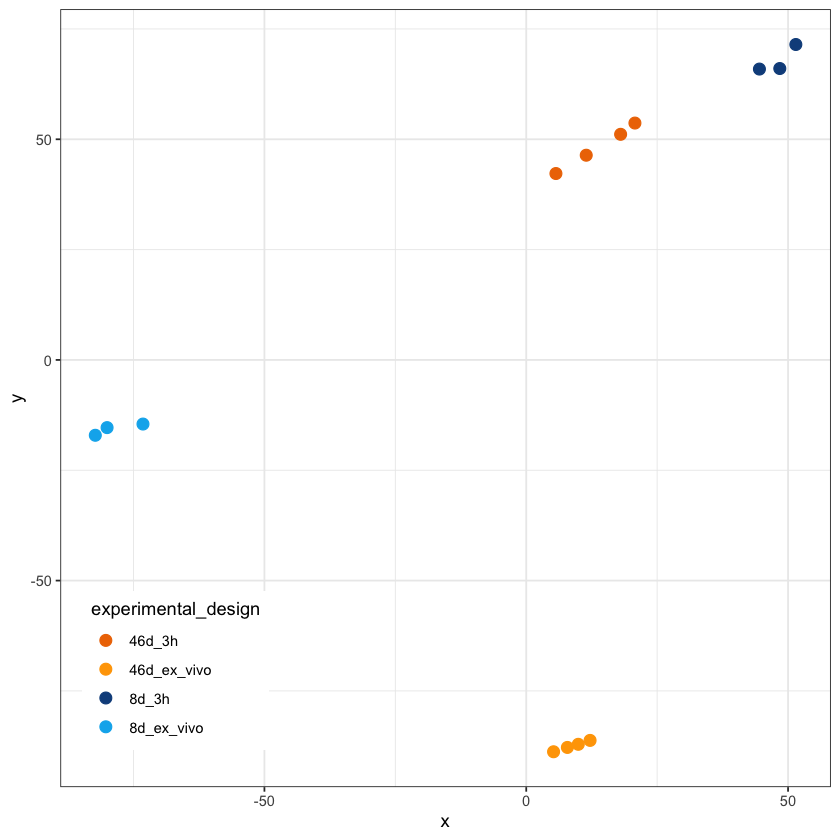

In [20]:
experimental_design <- c(rep("8d_ex_vivo", 3), rep("8d_3h", 3), rep("46d_ex_vivo", 4), rep("46d_3h", 4))
tsne_plot <- data.frame(x = tsne$Y[,1], y = tsne$Y[,2], sample=experimental_design)
ggplot(tsne_plot) + geom_point(aes(x=x, y=y, color=experimental_design), size=3) +
    theme_bw() +
    theme(legend.position = c(0.15, 0.15)) + 
    scale_color_manual(values = c("darkorange2", "orange1", "dodgerblue4", "deepskyblue2"))

## Intensity-based filtering

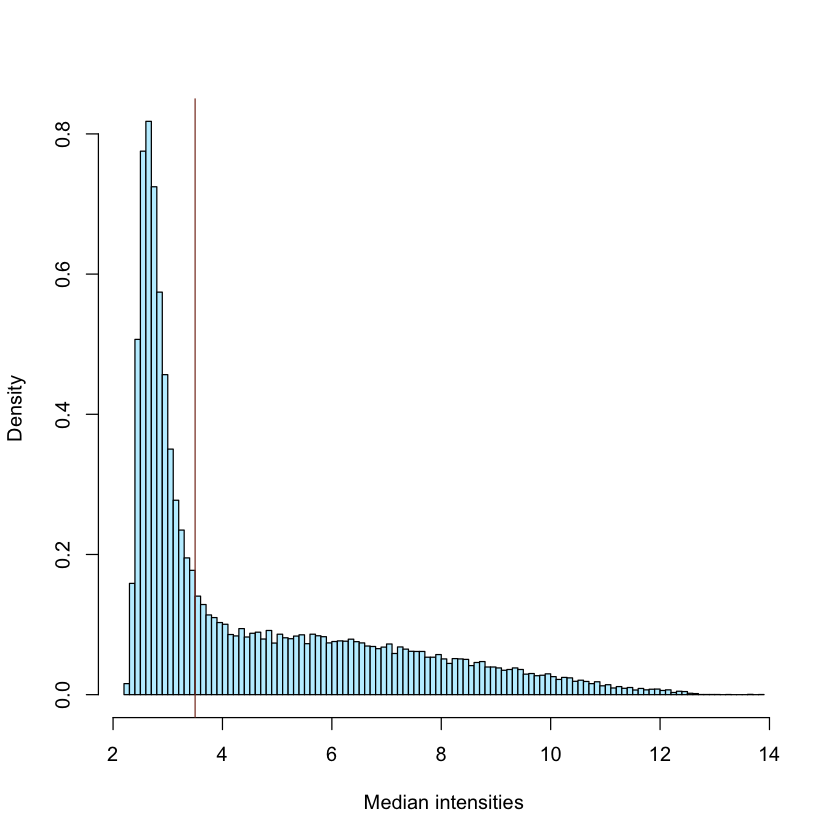

In [48]:
man_threshold <- 3.5
hist_res <- hist(cel_medians, 100, col = "lightblue1", freq = FALSE, 
            main = element_blank(),
            xlab = "Median intensities")

abline(v = man_threshold, col = "coral4", lwd = 1)

In [49]:
no_of_samples <- table(paste0(pData(cel_norm)$treatment, "_" ,pData(cel_norm)$day_post_infection))
no_of_samples 


3h stimulation_46  3h stimulation_8        ex vivo_46         ex vivo_8 
                4                 3                 4                 3 

In [53]:
samples_cutoff <- min(no_of_samples)
idx_threshold <- apply(Biobase::exprs(cel_norm), 1,
                           function(x){
                          sum(x > man_threshold) >= samples_cutoff})
table(idx_threshold)
cel_filtered <- subset(cel_norm, idx_threshold)

idx_threshold
FALSE  TRUE 
20995 24106 

## Annotation

In [84]:
anno_cel <- AnnotationDbi::select(mouse4302.db,
                                  keys = (featureNames(cel_filtered)),
                                  columns = c("SYMBOL", "GENENAME"),
                                  keytype = "PROBEID")
anno_cel <- subset(anno_cel, !is.na(SYMBOL))
anno_grouped <- group_by(anno_cel, PROBEID)
anno_summarized <- dplyr::summarize(anno_grouped, no_of_matches = n_distinct(SYMBOL))
anno_filtered <- filter(anno_summarized, no_of_matches > 1)
probe_stats <- anno_filtered
dim(probe_stats)

'select()' returned 1:many mapping between keys and columns


[1] 845   2

In [98]:
ids_to_exlude <- (featureNames(cel_filtered) %in% probe_stats$PROBEID)
table(ids_to_exlude)

ids_to_exlude
FALSE  TRUE 
23261   845 

In [99]:
cel_final <- subset(cel_filtered, !ids_to_exlude)

In [100]:
fData(cel_final)$PROBEID <- rownames(fData(cel_final))
fData(cel_final) <- left_join(fData(cel_final), anno_cel)
rownames(fData(cel_final)) <- fData(cel_final)$PROBEID

Joining, by = "PROBEID"


## DE analysis

(Manually) Describe experimental design and save it in design matrices

In [165]:
sample <- str_replace_all(as.character(Biobase::pData(cel_final)$file), ".CEL", "")

day_post_infection <- Biobase::pData(cel_final)$day_post_infection
day_post_infection <- ifelse(day_post_infection == "8", "8d", "46d")

treatment <- str_replace_all(Biobase::pData(cel_final)$treatment, " ", "_")
treatment <- ifelse(treatment == "ex_vivo", "ev", "x3h")

In [206]:
i_8d <- sample[day_post_infection == "8d"]
design_cel_8d <- model.matrix(~ 0 + treatment[day_post_infection == "8d"] + i_8d)
colnames(design_cel_8d)[1:2] <- c("ev", "x3h")
rownames(design_cel_8d) <- i_8d 

i_46d <- sample[day_post_infection == "46d"]
design_cel_46d <- model.matrix(~ 0 + treatment[day_post_infection == "46d"] + i_46d )
colnames(design_cel_46d)[1:2] <- c("ev", "x3h")
rownames(design_cel_46d) <- i_46d 

In [208]:
contrast_matrix_8d <- makeContrasts(ev-x3h, levels = design_cel_8d)

cel_fit_8d <- eBayes(contrasts.fit(lmFit(cel_final[,day_post_infection == "8d"],
                                design = design_cel_8d),
                                contrast_matrix_8d))

contrast_matrix_46d <- makeContrasts(ev-x3h, levels = make.names(colnames(design_cel_46d)))

cel_fit_46d <- eBayes(contrasts.fit(lmFit(cel_final[,day_post_infection == "46d"],
                                design = design_cel_46d),
                                contrast_matrix_46d))

Coefficients not estimable: i_8deberlein_d8_6_Mouse430_2 


Warning message:
“Partial NA coefficients for 23261 probe(s)”

ERROR: Error in .ebayes(fit = fit, proportion = proportion, stdev.coef.lim = stdev.coef.lim, : No residual degrees of freedom in linear model fits


In [213]:
design_cel_8d

,ev,x3h,i_8deberlein_d8_2_Mouse430_2,i_8deberlein_d8_3_Mouse430_2,i_8deberlein_d8_4_Mouse430_2,i_8deberlein_d8_5_Mouse430_2,i_8deberlein_d8_6_Mouse430_2
eberlein_d8_1_Mouse430_2,0,1,0,0,0,0,0
eberlein_d8_2_Mouse430_2,0,1,1,0,0,0,0
eberlein_d8_3_Mouse430_2,0,1,0,1,0,0,0
eberlein_d8_4_Mouse430_2,1,0,0,0,1,0,0
eberlein_d8_5_Mouse430_2,1,0,0,0,0,1,0
eberlein_d8_6_Mouse430_2,1,0,0,0,0,0,1


## Session info

In [ ]:
sessionInfo()